## S13 T01: Aprenentatge Supervisat - Classificació - Eduardo Baffi

### Part 1 (Exercises Level 1)

#### Descripció
Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.

### Nivell 1

#### - Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset Airlines Delay

Airline on-time statistics and delay causes
Source: https://www.kaggle.com/giovamata/airlinedelaycauses
### Variable descriptions
(available here: http://stat-computing.org/dataexpo/2009/the-data.html)
     
    Name: Description
1.	Year:	             1987-2008
2.	Month:	             1-12
3.	DayofMonth:	         1-31
4.	DayOfWeek:	         1 (Monday) - 7 (Sunday)
5.	DepTime	actual:       departure time (local, hhmm)
6.	CRSDepTime:	         scheduled departure time (local, hhmm)
7.	ArrTime:	             actual arrival time (local, hhmm)
8.	CRSArrTime:	         scheduled arrival time (local, hhmm)
9.	UniqueCarrier:	     unique carrier code
10.	FlightNum:	         flight number
11.	TailNum	plane:        tail number
12.	ActualElapsedTime:	 in minutes
13.	CRSElapsedTime:	     in minutes
14.	AirTime:	             in minutes
15.	ArrDelay:	         arrival delay, in minutes
16.	DepDelay:	         departure delay, in minutes
17.	Origin:	             origin IATA airport code
18.	Dest:	             destination IATA airport code
19.	Distance:	         in miles
20.	TaxiIn	taxi:         in time, in minutes
21.	TaxiOut	taxi:         out time in minutes
22.	Cancelled:	         was the flight cancelled?
23.	CancellationCode:	 reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	Diverted:	         1 = yes, 0 = no
25.	CarrierDelay:	     in minutes
26.	WeatherDelay:	     in minutes
27.	NASDelay:	         in minutes
28.	SecurityDelay:	     in minutes
29.	LateAircraftDelay:	 in minutes

Source: https://aspmhelp.faa.gov/index/Types_of_Delay.html
Carrier delay is within the control of the air carrier.

Late Arrival Delay: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.

NAS Delay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Weather Delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.        

In [2]:
pd.read_csv('DelayedFlights2.csv').to_parquet('DelayedFlights.dat')
df = pd.read_parquet('DelayedFlights.dat')
df.head(1)

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN           NaN      NaN   

  SecurityDelay  LateAircraftDelay  
0           NaN                NaN  

[1 rows x 30 columns]

In [3]:
#Create a column with binary values of delays.
#If there was a delay (ArrDelay>0), the value is 1. If not (ArrDelay<=0), value is 0.

flights_df = df.copy()

def binary(x):
    if x > 0:
        return 1
    else:
        return 0

flights_df['Delay'] = flights_df['ArrDelay'].apply(binary)
pd.set_option('display.max_columns', None)
flights_df.head(5)

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  Delay  
0       NaN            NaN                NaN      0  
1       NaN            NaN                NaN      1  
2       NaN            NaN                NaN      1  
3       0.0            0.0               32.0      1  
4       NaN            NaN                NaN      1

In [4]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [5]:
flights_df.duplicated().sum()

0

In [6]:
# Check null values
flights_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Delay                     0
dtype: int64

In [7]:
# % missing values per column 
missing_data_count = flights_df.isnull().sum()
total_rows = len(flights_df.index)
missing_percent = missing_data_count/total_rows*100
missing_percent

Unnamed: 0            0.000000
Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
Delay                 0.000000
dtype: float64

In [8]:
# Delete rows with a low % of null values:'ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'

# There are many null values in columns 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay' (about 35% of total). 
# The dataset is big, so these columns will be dropped to avoid distortion in the classification process
# Drop 'Unnamed: 0'column

flights_filtered = flights_df.copy()
flights_filtered = flights_filtered.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])
flights_filtered = flights_filtered.drop(['Unnamed: 0', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 1)
flights_filtered.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
Delay                0
dtype: int64

In [9]:
flights_filtered.head(1)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   

   CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0        2225            WN        335  N712SW              128.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  Delay  
0      8.0          0                N         0      0

In [10]:
# Feature selection

sample_df = flights_filtered.sample(frac=0.02) # The dataset is big, so a sample will be used to speed up performance

filtered_columns = ['DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'TailNum', 'ActualElapsedTime', 'AirTime','DepDelay',
                    'Distance','Delay']

selection_df = sample_df[filtered_columns]


In [11]:
# Categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(selection_df)

encoder = OneHotEncoder(sparse=False)

data_categorical = selection_df[categorical_columns]

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=selection_df.index)
result.head()

UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  \
1611877               0.0               1.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               1.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   

         UniqueCarrier_AS  UniqueCarrier_B6  UniqueCarrier_CO  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   

         UniqueCarrier_DL  UniqueCarrier_EV  UniqueCarrier_F9  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   

         UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   

         UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               1.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   

         UniqueCarrier_UA  UniqueCarrier_US  UniqueCarrier_WN  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               1.0   
402375                0.0               0.0               1.0   

         UniqueCarrier_XE  UniqueCarrier_YV  TailNum_80009E  TailNum_80019E  \
1611877               0.0               0.0             0.0             0.0   
623153                0.0               0.0             0.0             0.0   
1399477               0.0               0.0             0.0             0.0   
392377                0.0               0.0             0.0             0.0   
402375                0.0               0.0             0.0             0.0   

         TailNum_80059E  TailNum_80129E  TailNum_80139E  TailNum_80199E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   
392377              0.0             0.0             0.0             0.0   
402375              0.0             0.0             0.0             0.0   

         TailNum_80209E  TailNum_80219E  TailNum_80239E  TailNum_80249E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   
392377              0.0             0.0             0.0             0.0   
402375              0.0             0.0             0.0             0.0   

         TailNum_80259E  TailNum_80269E  TailNum_80279E  TailNum_80299E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0      

In [12]:
selection_df = selection_df.join(result) # Join the columns genetared after OneHotEncoder
selection_df

DayOfWeek  DepTime  ArrTime UniqueCarrier TailNum  ActualElapsedTime  \
1611877          4   1846.0   2214.0            AA  N3DJAA              148.0   
623153           7   1809.0   2118.0            OO  N765SK              129.0   
1399477          5   1026.0   1515.0            AA  N464AA              169.0   
392377           2   1926.0   2100.0            WN  N438WN              214.0   
402375           1   1652.0   1845.0            WN  N255WN              233.0   
...            ...      ...      ...           ...     ...                ...   
1188823          3    828.0   1011.0            FL  N930AT              163.0   
1888365          4   1238.0   1329.0            9E  86239E              111.0   
342262           5    927.0   1541.0            AA  N4YEAA              254.0   
1836573          3   1723.0   2152.0            DL  N3763D              389.0   
726940           3   2000.0   2124.0            DL  N989DL               84.0   

         AirTime  DepDelay  Distance  Delay  UniqueCarrier_9E  \
1611877    133.0      56.0      1062      1               0.0   
623153      91.0       9.0       738      1               0.0   
1399477    139.0      26.0      1171      1               0.0   
392377     198.0      11.0      1448      0               0.0   
402375     220.0      12.0      1497      1               0.0   
...          ...       ...       ...    ...               ...   
1188823    144.0       6.0      1072      1               0.0   
1888365     94.0      20.0       518      1               1.0   
342262     198.0      27.0      1721      1               0.0   
1836573    356.0      23.0      2153      1               0.0   
726940      61.0      20.0       373      1               0.0   

         UniqueCarrier_AA  UniqueCarrier_AQ  UniqueCarrier_AS  \
1611877               1.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               1.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   
...                   ...               ...               ...   
1188823               0.0               0.0               0.0   
1888365               0.0               0.0               0.0   
342262                1.0               0.0               0.0   
1836573               0.0               0.0               0.0   
726940                0.0               0.0               0.0   

         UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   
...                   ...               ...               ...   
1188823               0.0               0.0               0.0   
1888365               0.0               0.0               0.0   
342262                0.0               0.0               0.0   
1836573               0.0               0.0               1.0   
726940                0.0               0.0               1.0   

         UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_FL  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   
392377                0.0               0.0               0.0   
402375                0.0               0.0               0.0   
...                   ...               ...               ...   
1188823               0.0               0.0               1.0   
1888365               0.0               0.0               0.0   
342262                0.0               0.0               0.0   
1836573               0.0               0.0

In [13]:
# Drop categorical columns that were transformed
selection_df = selection_df.drop(['UniqueCarrier', 'TailNum'], 1)
selection_df.head(3)

DayOfWeek  DepTime  ArrTime  ActualElapsedTime  AirTime  DepDelay  \
1611877          4   1846.0   2214.0              148.0    133.0      56.0   
623153           7   1809.0   2118.0              129.0     91.0       9.0   
1399477          5   1026.0   1515.0              169.0    139.0      26.0   

         Distance  Delay  UniqueCarrier_9E  UniqueCarrier_AA  \
1611877      1062      1               0.0               1.0   
623153        738      1               0.0               0.0   
1399477      1171      1               0.0               1.0   

         UniqueCarrier_AQ  UniqueCarrier_AS  UniqueCarrier_B6  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   

         UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   

         UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   

         UniqueCarrier_MQ  UniqueCarrier_NW  UniqueCarrier_OH  \
1611877               0.0               0.0               0.0   
623153                0.0               0.0               0.0   
1399477               0.0               0.0               0.0   

         UniqueCarrier_OO  UniqueCarrier_UA  UniqueCarrier_US  \
1611877               0.0               0.0               0.0   
623153                1.0               0.0               0.0   
1399477               0.0               0.0               0.0   

         UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  TailNum_80009E  \
1611877               0.0               0.0               0.0             0.0   
623153                0.0               0.0               0.0             0.0   
1399477               0.0               0.0               0.0             0.0   

         TailNum_80019E  TailNum_80059E  TailNum_80129E  TailNum_80139E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

         TailNum_80199E  TailNum_80209E  TailNum_80219E  TailNum_80239E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

         TailNum_80249E  TailNum_80259E  TailNum_80269E  TailNum_80279E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

         TailNum_80299E  TailNum_80309E  TailNum_80319E  TailNum_80329E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

         TailNum_80339E  TailNum_80349E  TailNum_80359E  TailNum_80369E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

         TailNum_80399E  TailNum_80409E  TailNum_80419E  TailNum_83909E  \
1611877             0.0             0.0             0.0             0.0   
623153              0.0             0.0             0.0             0.0   
1399477             0.0             0.0             0.0             0.0   

   

In [14]:
selection_df.Delay.value_counts()

1    34469
0     4098
Name: Delay, dtype: int64

##### Decision Tree Classification

In [15]:
# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = selection_df.loc[: , selection_df.columns != 'Delay'] # Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # proportion: 70% training and 30% test

In [17]:
clf_dtree = DecisionTreeClassifier() # Create Decision Tree classifer object

clf_dtree = clf_dtree.fit(X_train,y_train) # Train Decision Tree Classifer

y_pred_dtree = clf_dtree.predict(X_test) #Predict the response for test dataset

In [18]:
y_predprob_dtree =  clf_dtree.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [19]:
# Model Accuracy (how often is the classifier correct?)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))

Accuracy: 0.8968974159536773


##### K-nearest neighbors (KNN)

In [20]:
# K-nearest neighbors (KNN) algorithm 

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

In [21]:
y_predprob_knn = classifier.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[  150  1039]
 [  277 10105]]
              precision    recall  f1-score   support

           0       0.35      0.13      0.19      1189
           1       0.91      0.97      0.94     10382

    accuracy                           0.89     11571
   macro avg       0.63      0.55      0.56     11571
weighted avg       0.85      0.89      0.86     11571



##### Logistic Regression

In [23]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Instantiate the model (default parameters)
logreg.fit(X_train,y_train)  # fit the model with data

y_pred_logr=logreg.predict(X_test)  # Prediction

In [24]:
y_predprob_logr=logreg.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [25]:
from sklearn import metrics  # Model Evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logr)
cnf_matrix

array([[  271,   918],
       [  178, 10204]], dtype=int64)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr))
print("Precision:",metrics.precision_score(y_test, y_pred_logr))
print("Recall:",metrics.recall_score(y_test, y_pred_logr))

Accuracy: 0.9052804424855242
Precision: 0.9174608883294372
Recall: 0.9828549412444616


##### Support Vector Machines (SVM)

In [27]:
# SVM

from sklearn import svm

svm_selection_df = selection_df.sample(frac=0.5) #Sample of the data set to speed up results
X = svm_selection_df[['DepTime','DepDelay']]  # Two features were choosen to speed up results because SVM is slow for large datasets

target_column = 'Delay'
y = svm_selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create a SVM Classifier
clf = svm.SVC(kernel='linear', probability=True, max_iter=1) # Linear Kernel

clf.fit(X_train, y_train) # Train the model using the training sets

y_pred_svm = clf.predict(X_test) # Predict the response for test dataset

In [28]:
y_predprob_svm = clf.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8964742481852748
Precision: 0.8964742481852748
Recall: 1.0


##### XGBoost

In [30]:
 selection_df.columns

Index(['DayOfWeek', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Delay', 'UniqueCarrier_9E', 'UniqueCarrier_AA',
       ...
       'TailNum_N995AT', 'TailNum_N995DL', 'TailNum_N996AT', 'TailNum_N996DL',
       'TailNum_N997AT', 'TailNum_N997DL', 'TailNum_N998AT', 'TailNum_N998DL',
       'TailNum_N999CA', 'TailNum_N999DN'],
      dtype='object', length=5078)

In [31]:
# XGBoost Algorithm

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

X =  selection_df[['DayOfWeek', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime',
       'DepDelay', 'Distance']]# Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg_reg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

xg_reg.fit(X_train,y_train)

pred_xg = xg_reg.predict(X_test)

In [32]:
predprob_xg = xg_reg.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, pred_xg))
print("RMSE: %f" % (rmse))

RMSE: 0.289535


In [34]:
np.mean(pred_xg)

0.9316394434361767

#### - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [35]:
# Class distribution of the testing set
y_test.value_counts()

1    10382
0     1189
Name: Delay, dtype: int64

In [36]:
# Percentage of ones
y_test.mean() 

0.8972431077694235

In [37]:
# Percentage of zeros
1 - y_test.mean()

0.10275689223057649

##### Decision Tree Classification

In [38]:
X = selection_df.loc[: , selection_df.columns != 'Delay'] # Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Accuracy: indicates how many of the predictions are correct

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))

Accuracy: 0.8968974159536773


In [40]:
# Confusion Matrix: shows the correct and incorrect (i.e. true or false) predictions on each class

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_dtree))

Confusion Matrix:
[[ 526  663]
 [ 530 9852]]


True Positives (TP): 9882

True Negatives (TN): 494

False Positives (FP): 685

False Negatives (FN): 510

In [41]:
print('True', y_test.values[0:25])
print('Pred', y_pred_dtree[0:25])

True [1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
Pred [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1]


In [42]:
# Save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_dtree)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 526  663]
 [ 530 9852]]


In [43]:
# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_dtree))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, y_pred_dtree)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, y_pred_dtree))

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, y_pred_dtree))

Classification Error: 0.10310258404632267
Sensitivity: 0.9489501059526103
Specificity: 0.44238856181665265
False Positive Rate: 0.5576114381833474
Precision: 0.9369472182596291
F1 Score: 0.9429104656170743


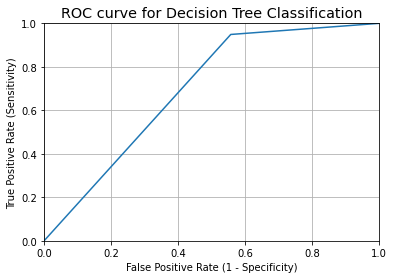

In [44]:
# ROC Curve

# First argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_dtree) #

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree Classification')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [45]:
# AUC
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_dtree))

AUC: 0.6956693338846314


##### K-nearest neighbors (KNN)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

confusion = metrics.confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_knn))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_knn)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_knn))
print('F1 Score:', metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.8862673926194797
Confusion Matrix:
[[  150  1039]
 [  277 10105]]
Classification Error: 0.11373260738052027
Sensitivity: 0.9733192063186284
Specificity: 0.1261564339781329
False Positive Rate: 0.8738435660218671
Precision: 0.9067659727207465
F1 Score: 0.9388646288209607


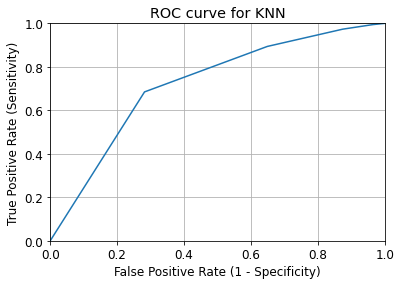

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_knn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [48]:
# AUC
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_knn))

AUC: 0.7209229388575913


##### Logistic Regression

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr))

confusion = metrics.confusion_matrix(y_test, y_pred_logr)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_logr))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_logr)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_logr))
print('F1 Score:', metrics.f1_score(y_test, y_pred_logr))

Accuracy: 0.9052804424855242
Confusion Matrix:
[[  271   918]
 [  178 10204]]
Classification Error: 0.0947195575144758
Sensitivity: 0.9828549412444616
Specificity: 0.22792262405382674
False Positive Rate: 0.7720773759461732
Precision: 0.9174608883294372
F1 Score: 0.9490327380952381


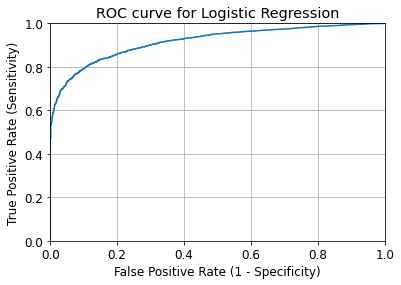

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_logr)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [51]:
# AUC
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_logr))

AUC: 0.9169741120484296


##### Support Vector Machines (SVM)

In [52]:
svm_selection_df = selection_df.sample(frac=0.5) #Sample of the data set to speed up results
X = svm_selection_df[['DepTime','DepDelay']]  # Two features were choosen to speed up results because SVM is slow for large datasets

target_column = 'Delay'
y = svm_selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

confusion = metrics.confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_svm))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_svm)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_svm))
print('F1 Score:', metrics.f1_score(y_test, y_pred_svm))

Accuracy: 0.8947459384721742
Confusion Matrix:
[[   0  609]
 [   0 5177]]
Classification Error: 0.10525406152782579
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.8947459384721742
F1 Score: 0.9444495119948919


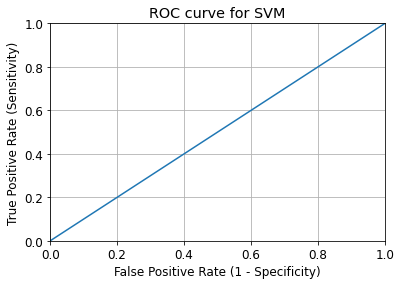

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_svm)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [55]:
# AUC
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_svm))

AUC: 0.5


##### XGBoost

In [56]:
X =  selection_df[['DayOfWeek', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime',
       'DepDelay', 'Distance']]# Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_xg))

confusion = metrics.confusion_matrix(y_test, pred_xg)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_xg))
print('Sensitivity:', metrics.recall_score(y_test, pred_xg)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, pred_xg))
print('F1 Score:', metrics.f1_score(y_test, pred_xg))

Accuracy: 0.9161697346815314
Confusion Matrix:
[[  505   684]
 [  286 10096]]
Classification Error: 0.0838302653184686
Sensitivity: 0.9724523213253708
Specificity: 0.4247266610597141
False Positive Rate: 0.575273338940286
Precision: 0.9365491651205937
F1 Score: 0.9541631225782062


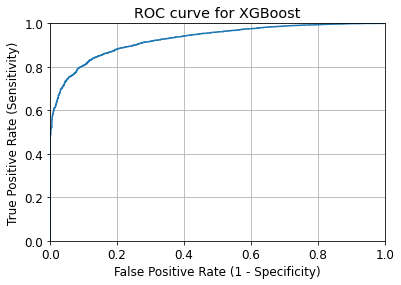

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predprob_xg)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [59]:
# AUC
print('AUC:', metrics.roc_auc_score(y_test, predprob_xg))

AUC: 0.9283491726234462


#### - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

##### Decision Tree Classification

In [60]:
X = selection_df.loc[: , selection_df.columns != 'Delay'] # Features

target_column = 'Delay'
y = selection_df[target_column] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

clf_dtree_2 = DecisionTreeClassifier(criterion="entropy", max_depth=5) # Parameters were changed to verify the results
clf_dtree_2 = clf_dtree_2.fit(X_train,y_train) 
y_pred_dtree_2 = clf_dtree_2.predict(X_test)

y_predprob_dtree_2 =  clf_dtree_2.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree_2))

confusion = metrics.confusion_matrix(y_test, y_pred_dtree_2)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_dtree_2))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_dtree_2)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_dtree_2))
print('F1 Score:', metrics.f1_score(y_test, y_pred_dtree_2))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_dtree_2))

Accuracy: 0.8996629504796474
[[   86  1103]
 [   58 10324]]
Classification Error: 0.1003370495203526
Sensitivity: 0.994413407821229
Specificity: 0.07232968881412952
False Positive Rate: 0.9276703111858705
Precision: 0.9034742277063096
F1 Score: 0.9467650969783118
AUC: 0.8833677165580136


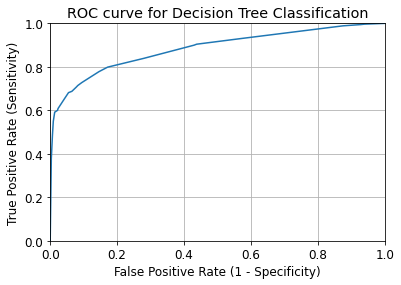

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_dtree_2) #

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree Classification')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

##### K-nearest neighbors (KNN)

In [62]:
classifier_2 = KNeighborsClassifier(n_neighbors=3, weights='distance') # Parameters were changed to verify the results
classifier_2.fit(X_train, y_train)

y_pred_knn_2 = classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn_2))

confusion = metrics.confusion_matrix(y_test, y_pred_knn_2)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_knn_2))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_knn_2)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_knn_2))
print('F1 Score:', metrics.f1_score(y_test, y_pred_knn_2))

Accuracy: 0.8862673926194797
Confusion Matrix:
[[  150  1039]
 [  277 10105]]
Classification Error: 0.11373260738052027
Sensitivity: 0.9733192063186284
Specificity: 0.1261564339781329
False Positive Rate: 0.8738435660218671
Precision: 0.9067659727207465
F1 Score: 0.9388646288209607


In [63]:
y_predprob_knn_2 = classifier_2.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

In [64]:
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_knn_2))

AUC: 0.701415069654586


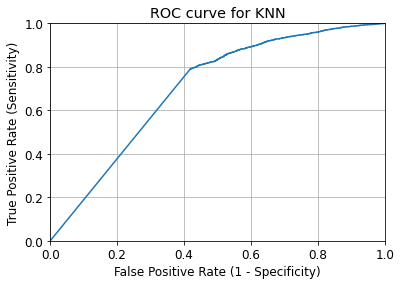

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_knn_2)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

##### Logistic Regression

In [66]:
logreg_2 = LogisticRegression(class_weight='balanced', solver='sag', max_iter=150)  # Instantiate the model after changing some parameters
logreg_2.fit(X_train,y_train)  

y_pred_logr_2=logreg_2.predict(X_test) 

y_predprob_logr_2 = logreg_2.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr_2))

confusion = metrics.confusion_matrix(y_test, y_pred_logr_2)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_logr_2))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_logr_2)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_logr_2))
print('F1 Score:', metrics.f1_score(y_test, y_pred_logr_2))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_logr_2))

Accuracy: 0.7894736842105263
Confusion Matrix:
[[1030  159]
 [2277 8105]]
Classification Error: 0.21052631578947367
Sensitivity: 0.780678096705837
Specificity: 0.8662741799831791
False Positive Rate: 0.13372582001682087
Precision: 0.9807599225556631
F1 Score: 0.869355357717473
AUC: 0.8965259630475791


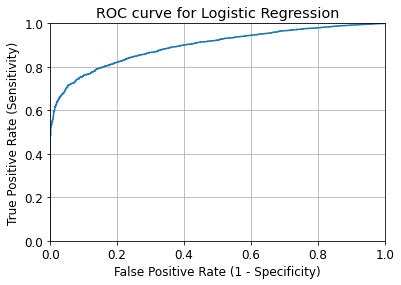

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_logr_2)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

##### Support Vector Machines (SVM)

In [68]:
svm_selection_df = selection_df.sample(frac=0.5) # Sample of the data set to speed up results
X = svm_selection_df[['DepTime','DepDelay']]  # Two features were choosen to speed up results because SVM is slow for large datasets

target_column = 'Delay'
y = svm_selection_df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create a SVM Classifier
clf_2 = svm.SVC(kernel='poly', degree=2, probability=True, max_iter=5) # Instantiate the model after changing some parameters
clf_2.fit(X_train, y_train) 

y_pred_svm_2 = clf_2.predict(X_test)
y_predprob_svm_2 = clf_2.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_2))

confusion = metrics.confusion_matrix(y_test, y_pred_svm_2)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_svm_2))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_svm_2)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_svm_2))
print('F1 Score:', metrics.f1_score(y_test, y_pred_svm_2))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_svm_2))

Accuracy: 0.6700656757690978
Confusion Matrix:
[[ 110  515]
 [1394 3767]]
Classification Error: 0.3299343242309022
Sensitivity: 0.7298973067235032
Specificity: 0.176
False Positive Rate: 0.8240000000000001
Precision: 0.8797290985520785
F1 Score: 0.7978396695965265
AUC: 0.43196217787250535


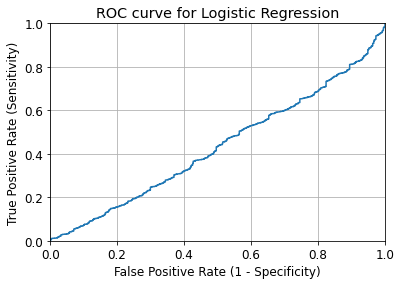

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob_svm_2)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

##### XGBoost

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

X =  selection_df[['DayOfWeek', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime',
       'DepDelay', 'Distance']]# Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg_reg_2 = xgb.XGBClassifier(booster='dart', gamma=5, reg_lambda=2, objective="binary:logistic", verbosity = 0, random_state=42)

xg_reg_2.fit(X_train,y_train)

pred_xg_2 = xg_reg_2.predict(X_test)

predprob_xg_2 = xg_reg_2.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, pred_xg_2))

confusion = metrics.confusion_matrix(y_test, pred_xg_2)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_xg_2))
print('Sensitivity:', metrics.recall_score(y_test, pred_xg_2)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, pred_xg_2))
print('F1 Score:', metrics.f1_score(y_test, pred_xg_2))
print('AUC:', metrics.roc_auc_score(y_test, predprob_xg_2))

Accuracy: 0.9166882724051508
Confusion Matrix:
[[  468   721]
 [  243 10139]]
Classification Error: 0.08331172759484917
Sensitivity: 0.9765941051820458
Specificity: 0.3936080740117746
False Positive Rate: 0.6063919259882253
Precision: 0.933609576427256
F1 Score: 0.9546182092081724
AUC: 0.92535213709307


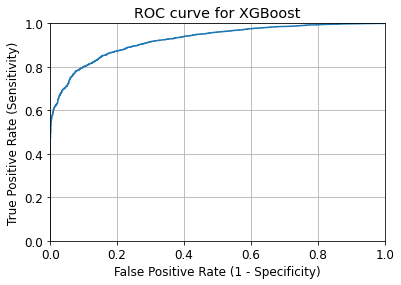

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predprob_xg_2)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### - Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

#### Performance traint/test

Along the exercise 2 and 3, different classification models where evaluated using train/test. In exercise 3, some parameters where changed for each model in order to check the effect over the results of in terms of the folowing metrics:
* Accuracy
* Confusion Matrix
* Classification Error
* Sensitivity
* Specificity
* False Positive Rate
* Precision
* F1 Score
* AUC
* ROC Curves

Percentage of ones: 89,81%
Percentage of zeros: 10,19%

* Null accuracy: accuracy that could be achieved by always predicting the most frequent class. 

This means that a dumb model that always predicts 1 would be right 89,8%1 of the time, i.e. it would be worng only 10,19% of the time. This shows how classification accuracy of the majority of the models is not that good as it's close to a dumb model.
Logistic Regression ans XGBoost achieved better results of accuracy.

* Classification Error: Overall, how often is the classifier incorrect?

Again Logistic Regression ans XGBoost achieved fewer mistakes.

* Sensitivity  (or Recall): reflects the ratio of correctly classified positives to actual positive cases.

Except for SVM, all models achieved high results. 

* Specificity: When the actual value is negative, how often is the prediction correct?

Models did not generate good results in this aspect. 
Our classifiers, in general, are highly sensitive and not specifics

* False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

The results are not good in this aspect.

* Precision: When a positive value is predicted, how often is the prediction correct?

The models were kite sucessfull to predict positive values. The best result in obtained with Decision Tree.

* F1 Score: summarizes both precision and recall and can be understood as the harmonic mean of the two measures.

The best result is obtained with XGBoost.

* AUC: It is the area under ROC curve between (0,0) and (1,1): 

The best result is obtained with XGBoost.


The maind results obtained in execise 2 were mostly using default parameters: 

| - | Decision Tree | KNN | Logistic Regression | SVM | XGBoost
| :- | :-: | :-: | :-: | :-: | :-: |
| Accuracy | 0.8967245700458042 | 0.887390891020655 | 0.9077867081496845 |0.8990667127549257| 0.9161697346815314 |
| Classification Error |0.10327542995419581|0.11260910897934495 |0.09221329185031546 |0.10093328724507433|0.0838302653184686 |
| Sensitivity | 0.9509237875288684 | 0.9770977675134719 | 0.9839299461123941 | 1.00000000000| 0.973729792147806 | 
| Specificity | 0.41899915182357933  | 0.09669211195928754 | 0.2366412213740458 | 0.00000000000 | 0.40882103477523324 |
| False Positive Rate | 0.5810008481764206 | 0.9033078880407125 | 0.7633587786259541 | 1.000000000| 0.5911789652247668 |
| Precision | 0.9351755465127283 | 0.905071753275693 | 0.9191011235955057 | 0.8990667127549257 | 0.9355584319526628 |
| F1 Score | 0.9429839209885967 | 0.9397066308824209 | 0.9504113026908956 | 0.9468511103021477  | 0.9542625424368164 |
| AUC | 0.6849614696762238  | 0.7173667142011112 | 0.9124926298757902 | 0.50000000000 | 0.9187377695114857 |

According to the results from the table above, the support XGBoost and Logistic Regression obtained the best results and this could indicate that they are the the most reliable machine learning classifiers for this data set. The results of SVM are poor. It is necessary to use feature engineering, to adjust parameters and to continue analysing the results to confirm this opinion.

After changing some parameters of the classificaton models, the following results were obtained:

| - | Decision Tree | KNN | Logistic Regression | SVM | XGBoost
| :- | :-: | :-: | :-: | :-: | :-: |
| Accuracy |0.9002679111572034|0.887390891020655|0.7856710742373174|0.55876253024542|0.9144412756028001|
| Classification Error |0.0997320888427966 |0.11260910897934495|0.2143289257626826|0.44123746975458|0.08555872439719991|
| Sensitivity |0.9923017705927637|0.9770977675134719|0.7767513471901463|0.5884281581485054|0.977963818321786|
| Specificity |0.089058524173028|0.09669211195928754|0.8642917726887193|0.30282861896838603|0.35453774385072095|
| False Positive Rate |0.910941475826972|0.9033078880407125|0.13570822731128074|0.697171381031614|0.6454622561492791|
| Precision |0.9056736342877217|0.905071753275693|0.9805636540330418|0.8792507204610951|0.9303368729403149|
| F1 Score |0.9470107447883185|0.9397066308824209|0.8668384879725086|0.7050259965337955|0.9535560142615874|
| AUC |0.8779308690510937|0.6981592971954025|0.8948247363242163|0.5600728133920162|0.9192588609624027|

It should be noticed that ths result of the "Specificity" of the Logistic Regression had a significant improvement, although the sensitivity was reduced at the same time. Depending on the context it makes sense to make those change. The results of SVM also have gotten much better, in special specificity and false positive rate. However other models are still more reliable for the data set.

#### Cross-Validation

In [72]:
# Decision Tree
# # k-Fold Cross-Validation

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = selection_df.loc[: , selection_df.columns != 'Delay'].values # Features

target_column = 'Delay'
y = selection_df[target_column].values # Target variable

# prepare the cross-validation procedure
cv = KFold(n_splits=3, random_state=42, shuffle=True)
# create model
model_dtree = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model_dtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.892 (0.002)


In [78]:
# Repeated k-Fold 

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
model_dtree = DecisionTreeClassifier()
scores = cross_val_score(model_dtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.876 (0.003)


In [79]:
# KNN

cv = KFold(n_splits=3, random_state=42, shuffle=True)
model_knn = KNeighborsClassifier()
scores = cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.885 (0.002)


In [80]:
# Logistic Regression

cv = KFold(n_splits=3, random_state=42, shuffle=True)
model_logr = LogisticRegression()
scores = cross_val_score(model_logr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.905 (0.001)


In [81]:
# SVM

X = svm_selection_df[['DepTime','DepDelay']]  # Two features were choosen to speed up results because SVM is slow for large datasets

target_column = 'Delay'
y = svm_selection_df[target_column] 

cv = KFold(n_splits=3, random_state=42, shuffle=True)
model_svm = svm.SVC(kernel='linear', probability=True, max_iter=1)
scores = cross_val_score(model_svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.892 (0.000)


In [82]:
# XGBoost
X =  selection_df[['DayOfWeek', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime',
       'DepDelay', 'Distance']]# Features

target_column = 'Delay'
y = selection_df[target_column] # Target variable

cv = KFold(n_splits=3, random_state=42, shuffle=True)
model_xgboost = xgb.XGBClassifier()
scores = cross_val_score(model_xgboost, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.913 (0.002)


XGBoost and Logistic Regression presented the best results, with accuracy over 0,90

### Exercises Nivell 2 and 3 were done ina different file.

